#### To run this file, you need to ...
1️⃣ Download the dataset from the [OpenAgrar Repository](https://www.openagrar.de/receive/openagrar_mods_00084346)

2️⃣ Make sure requirements.txt is installed

In [48]:
import rasterio
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
from IPython.display import Image, display
import glob
import os
from math import ceil

### 👋 How does the tree species look like?
First we need to read tree species and tree code from .csv file

In [55]:
# Read the tree species codes
species_codes = pd.read_csv('openagrar_derivate_00057802/tree_species_code.csv')
species_codes.T

0      1            2    3      4       5     6      7    8    9   \
ID           2      3            4    5      6       8     9     10   14   16   
species  Birch  Beech  Douglas fir  Oak  Alder  Spruce  Pine  Larch  Fir  ODH   

          10  
ID        17  
species  ODL

In [57]:
# Read the TIF file metadata
with rasterio.open('openagrar_derivate_00057802/Dominant_Species_Class.tif') as src:
    print("Raster Dataset Information:")
    print(f"Image size: {src.width} x {src.height} pixels")
    print(f"Coordinate Reference System: {src.crs}")
    print(f"Bounds: {src.bounds}")
    print(f"Resolution: {src.res}")

Raster Dataset Information:
Image size: 64076 x 86147 pixels
Coordinate Reference System: EPSG:32632
Bounds: BoundingBox(left=280460.0, bottom=5236910.0, right=921220.0, top=6098380.0)
Resolution: (10.0, 10.0)


### 🌍 Since the region is too large...
we need to split the region into several windows and analyze the tree species distribution in each window. Distributions of each window are saved temporarily and eventually the best 15 windows are chosen for further analysis.

In [ ]:
with open('split_output/all_windows_statistics.pkl', 'rb') as f:
    windows_stats = pickle.load(f)
# Convert to DataFrame for easier analysis
df_stats = pd.DataFrame([
    {
        'x': w['coordinates'][0],
        'y': w['coordinates'][1],
        'invalid_percentage': w['invalid_percentage']
    } for w in windows_stats
])
# Show first 3 instances of window_stats
# df_stats[:3]

x  y  invalid_percentage
0  16000  0           99.743600
1  18000  0           99.948125
2  20000  0           97.299550

In [62]:
print("Summary Statistics of All Windows:")
print(f"Total number of processed windows: {len(df_stats)}")
print("\nInvalid Pixel Percentage Statistics:")
print(df_stats['invalid_percentage'].describe())

Summary Statistics of All Windows:
Total number of processed windows: 1014

Invalid Pixel Percentage Statistics:
count    1014.000000
mean       72.966157
std        17.734827
min        11.258700
25%        60.931044
50%        74.117887
75%        87.315162
max        99.999825
Name: invalid_percentage, dtype: float64


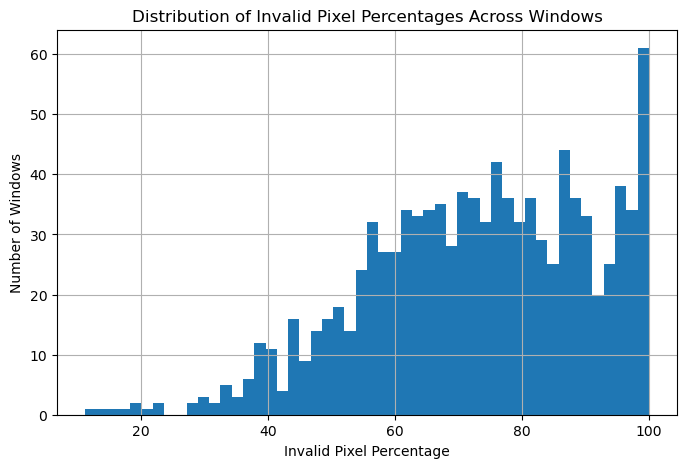

In [65]:
# Plot distribution of invalid pixel percentages
plt.figure(figsize=(8, 5))
plt.hist(df_stats['invalid_percentage'], bins=50)
plt.title('Distribution of Invalid Pixel Percentages Across Windows')
plt.xlabel('Invalid Pixel Percentage')
plt.ylabel('Number of Windows')
plt.grid(True)

In [91]:
# Get the best 15 windows information
best_windows = df_stats.nsmallest(15, 'invalid_percentage')
best_windows.T

860         417           790           703  \
x                   16000.0000  32000.0000  12000.000000  24000.000000   
y                   70000.0000  36000.0000  64000.000000  56000.000000   
invalid_percentage     11.2587     13.6778     15.610725     16.894275   

                             883           767           766         608  \
x                   16000.000000  14000.000000  12000.000000  34000.0000   
y                   72000.000000  62000.000000  62000.000000  48000.0000   
invalid_percentage     18.737325     19.486575     20.135425     21.9311   

                             679          242           748           538  \
x                   24000.000000  30000.00000  22000.000000  16000.000000   
y                   54000.000000  24000.00000  60000.000000  44000.000000   
invalid_percentage     22.557325     28.19905     28.362975     30.500575   

                           968         906         418  
x                   12000.0000  16000.0000  34000.0000  
y                   80000.0000  74000.0000  36000.0000  
invalid_percentage     30.6223     30.7258     30.8991

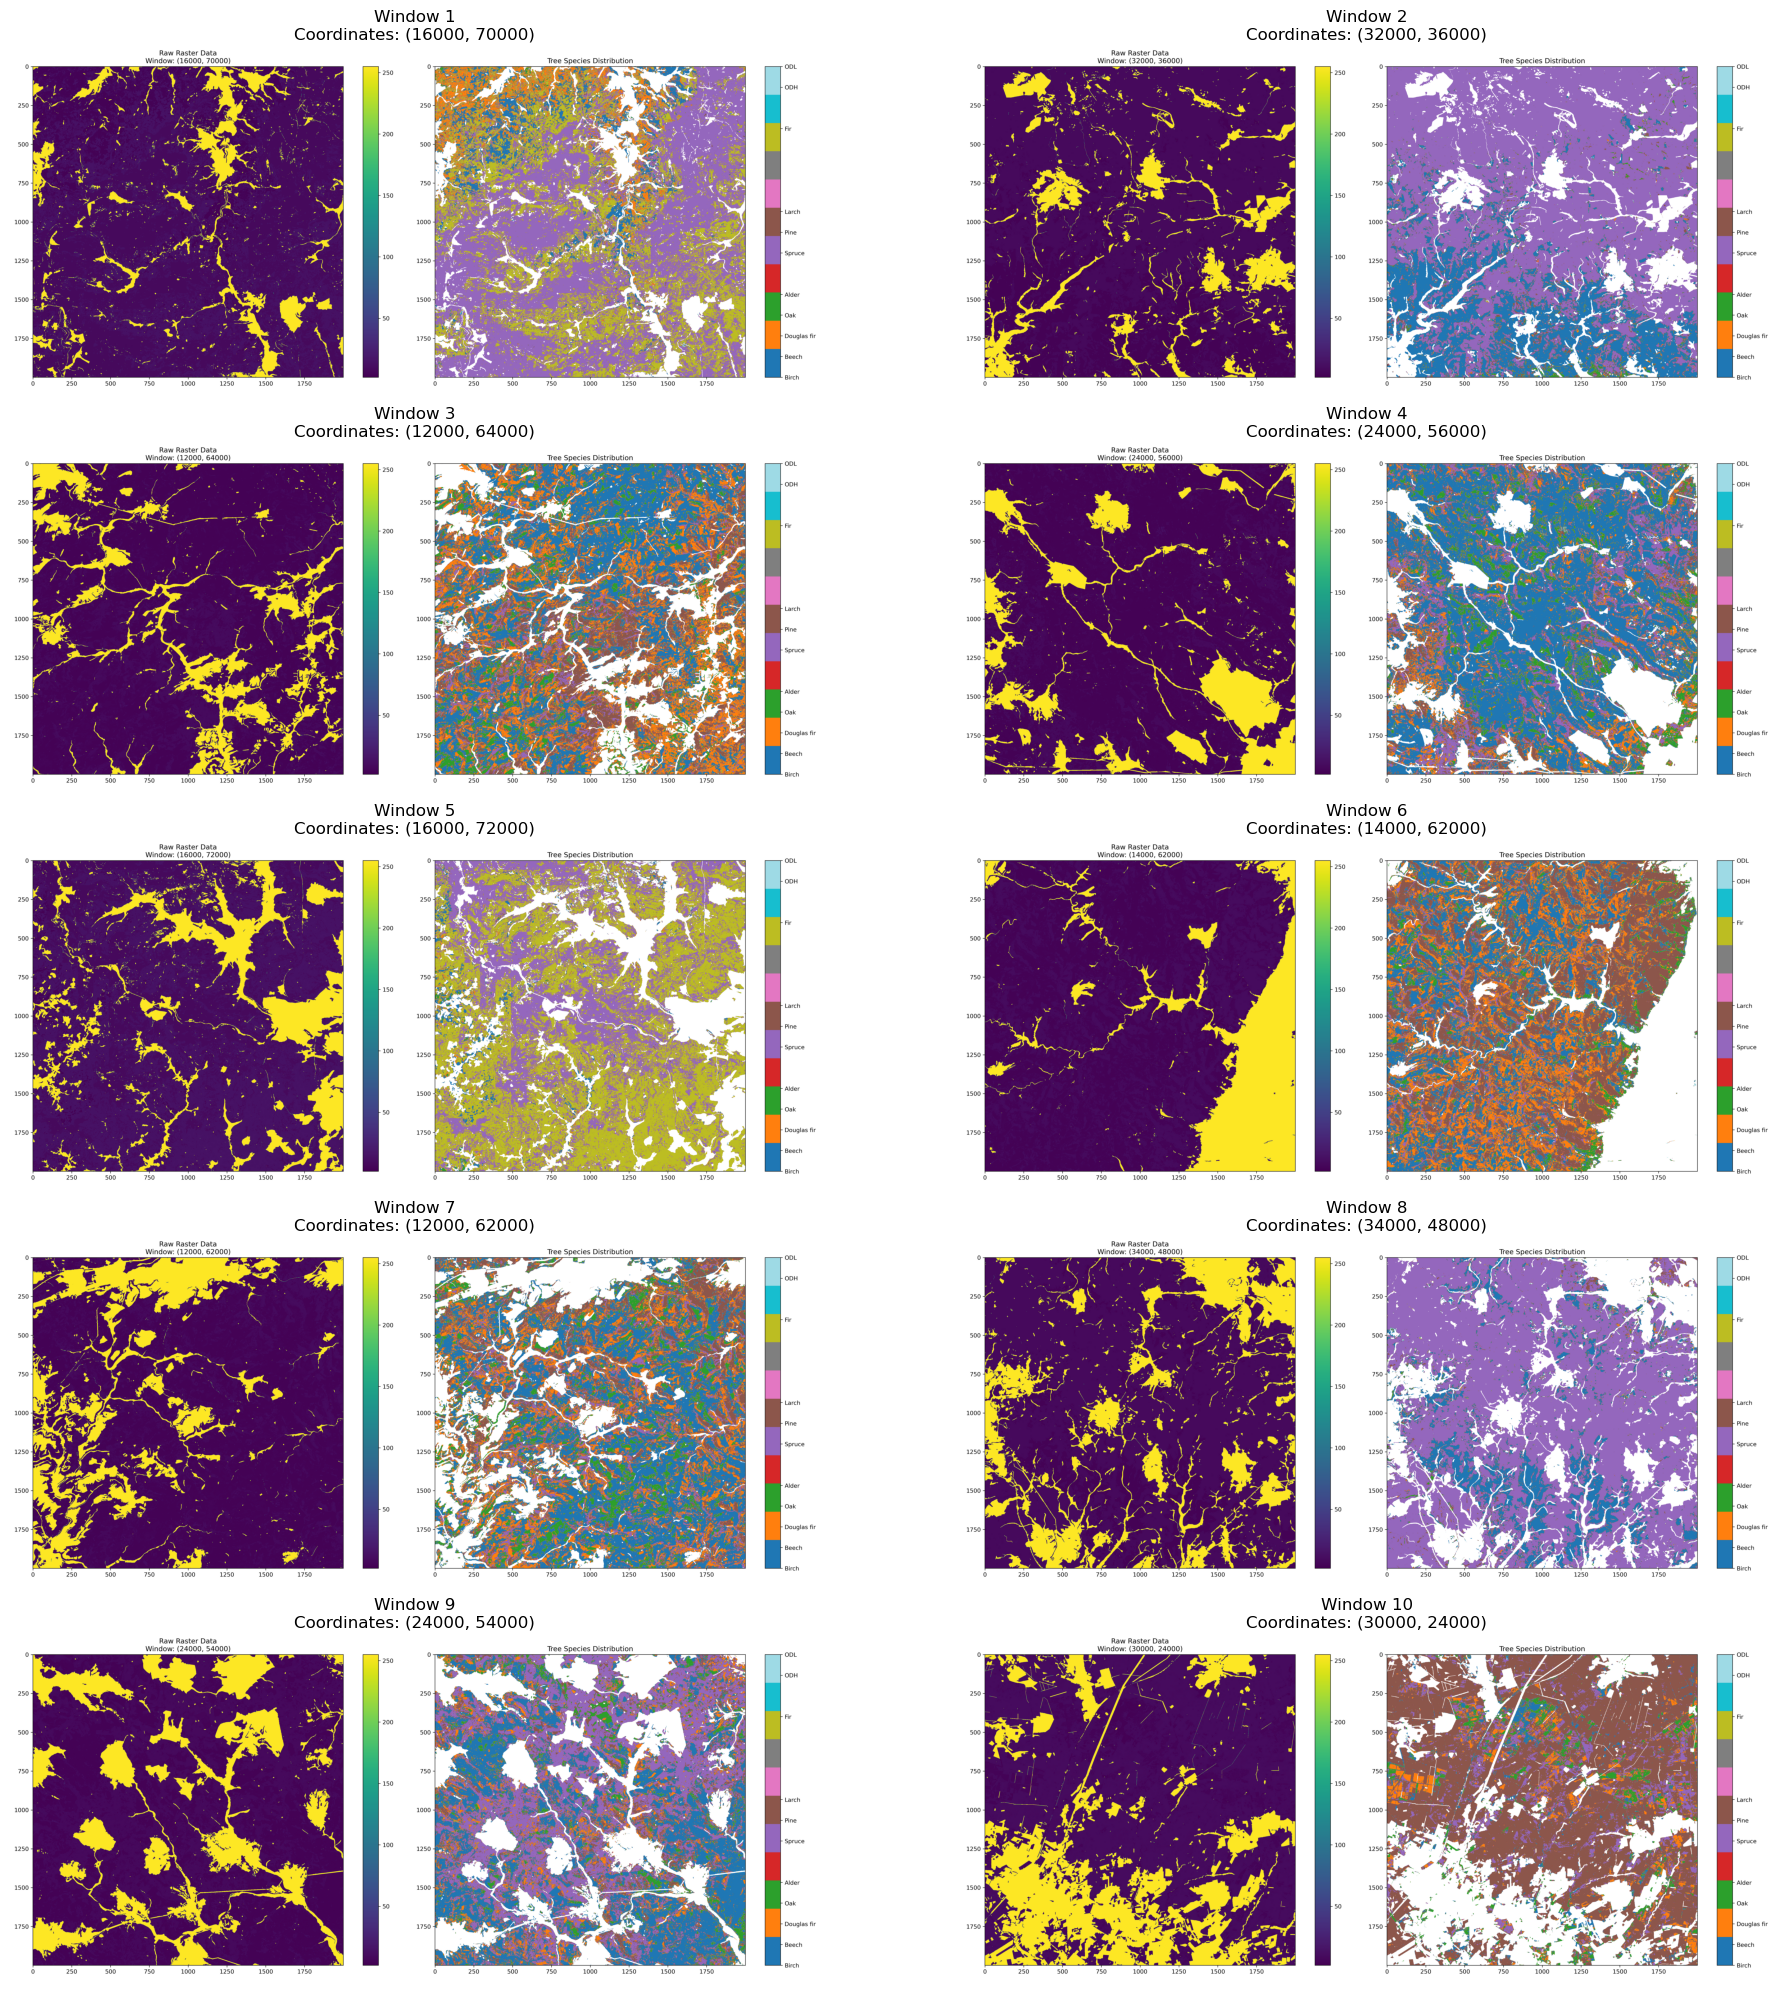

In [93]:
"""
no need to run this part
"""
# # Get all PNG files in split_output directory
# png_files = glob.glob('split_output/*.png')

# # Sort files to ensure consistent order
# # Sort by the numeric value in the filename (best_X_...)
# png_files = sorted(png_files, 
#                   key=lambda x: int(os.path.basename(x).split('_')[1]) 
#                   if 'best' in x else float('inf'))

# # Take only the first 10 files
# png_files = [f for f in png_files if 'best' in f][:10]

# if png_files:
#     # Create a figure with appropriate size
#     plt.figure(figsize=(20, 4*ceil(len(png_files)/2)))
    
#     # Plot each image in a grid
#     for i, file in enumerate(png_files, 1):
#         plt.subplot(ceil(len(png_files)/2), 2, i)
#         img = mpimg.imread(file)
#         plt.imshow(img)
        
#         # Get coordinates from filename
#         filename = os.path.basename(file)
#         coords = filename.split('_')[3:5]  # Get x,y coordinates
#         plt.title(f'Window {i}\nCoordinates: ({coords[0]}, {coords[1].split(".")[0]})')
#         plt.axis('off')
    
#     plt.tight_layout()
#     plt.show()